In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# columns = ["received", "global time", "len of queue", "logical clock time"]
A = pd.read_csv("machine_A_log.csv")
B = pd.read_csv("machine_B_log.csv")
C = pd.read_csv("machine_C_log.csv")

In [16]:
A

,received,global time,len of queue,logical clock time
0,"RECEIVED FROM ('127.0.0.1', 60888)",1.678160e+09,1,17
1,"RECEIVED FROM ('127.0.0.1', 61077)",1.678160e+09,2,17
2,SEND TO B,1.678160e+09,0,0
3,SEND TO C,1.678160e+09,0,1
4,SEND TO C,1.678160e+09,0,2
5,"RECEIVED FROM ('127.0.0.1', 61076)",1.678160e+09,1,24
6,"RECEIVED FROM ('127.0.0.1', 60888)",1.678160e+09,2,24
7,"RECEIVED FROM ('127.0.0.1', 61077)",1.678160e+09,3,24
8,SEND TO C,1.678160e+09,0,3


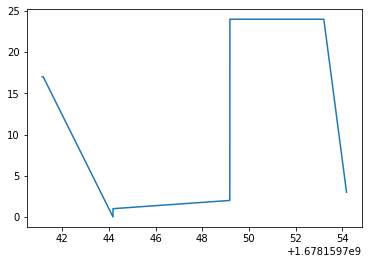

In [17]:
plt.plot(A["global time"], A["logical clock time"], label="A")

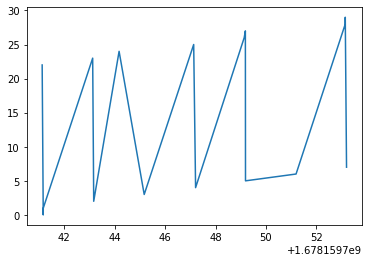

In [18]:
plt.plot(B["global time"], B["logical clock time"], label="B")